In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap

import itertools

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\\csv\\week2.csv')
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
df.index = df['Date'].dt.floor('d')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,
2017-05-15,DHFL,EQ,2017-05-15,426.65,429.50,434.40,427.05,431.00,431.40,430.94,1160661,5.001759e+08,15111,295581,25.47,0.000000,Slight or No change
2017-05-16,DHFL,EQ,2017-05-16,431.40,431.00,433.80,421.65,424.05,424.45,425.13,1662805,7.069152e+08,31644,681320,40.97,-1.611034,Negative
2017-05-17,DHFL,EQ,2017-05-17,424.45,424.50,432.50,420.10,428.30,429.00,428.13,1443843,6.181483e+08,20808,371928,25.76,1.071975,Positive
2017-05-18,DHFL,EQ,2017-05-18,429.00,424.95,427.90,416.55,418.50,417.95,422.22,1639654,6.923007e+08,32812,534358,32.59,-2.575758,Negative
2017-05-19,DHFL,EQ,2017-05-19,417.95,423.00,426.45,398.65,405.90,404.20,411.93,2693962,1.109716e+09,33554,884888,32.85,-3.289867,Among top losers


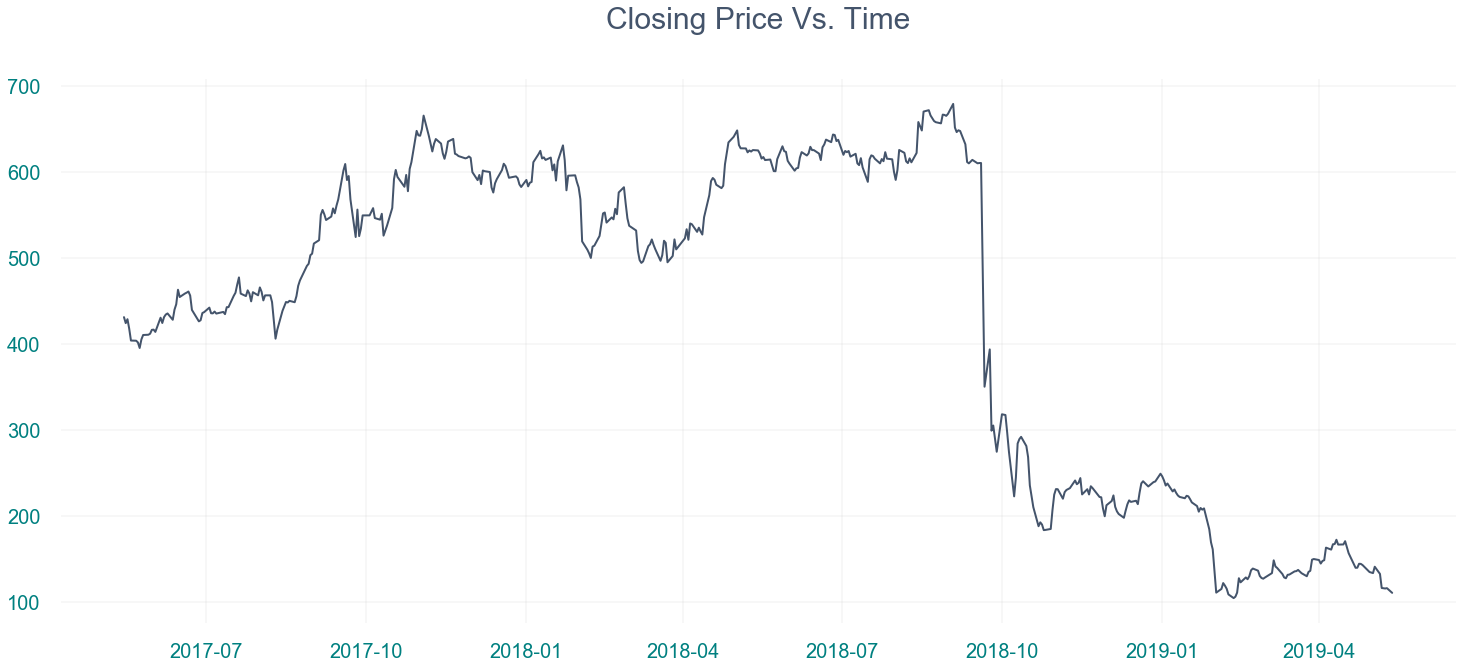

In [3]:
x = df.index
y = df['Close Price']

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Closing Price Vs. Time', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

sns.lineplot(x, y, color='#44546B', linewidth=2, ax=ax)

# labels = [item.get_text()[:7] for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)

plt.xlabel('')
plt.ylabel('');

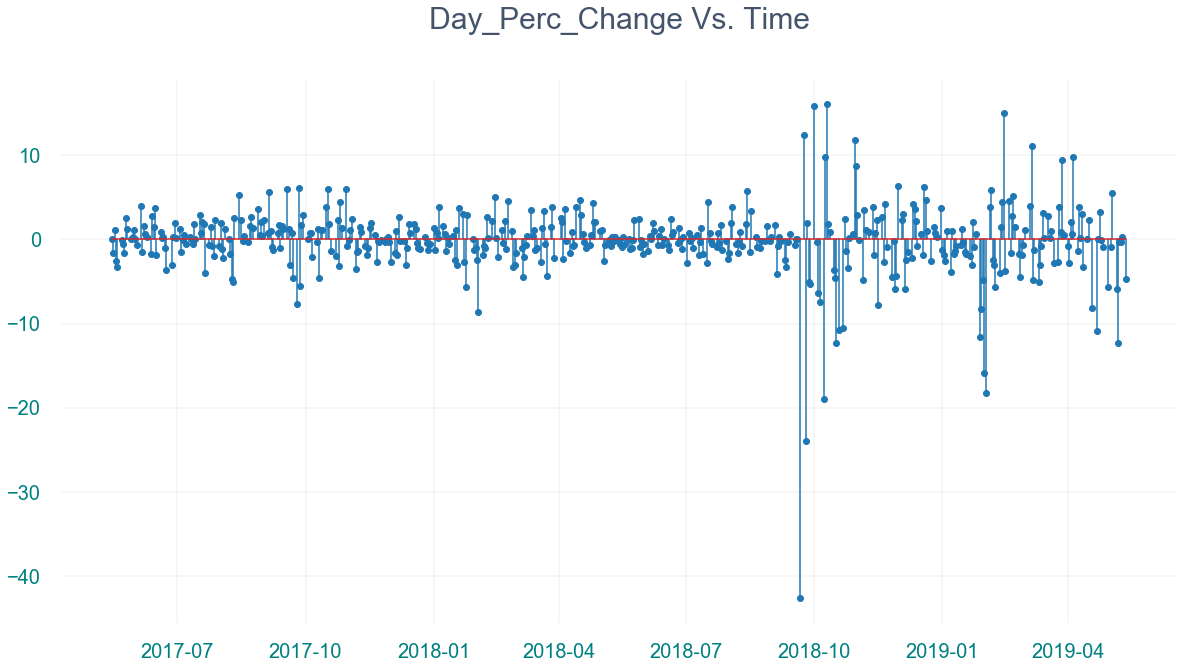

In [4]:
x = df.index
y = df['Day_Perc_Change']

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Day_Perc_Change Vs. Time', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

plt.stem(x, y)

# labels = [item.get_text()[:7] for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)

plt.xlabel('')
plt.ylabel('');

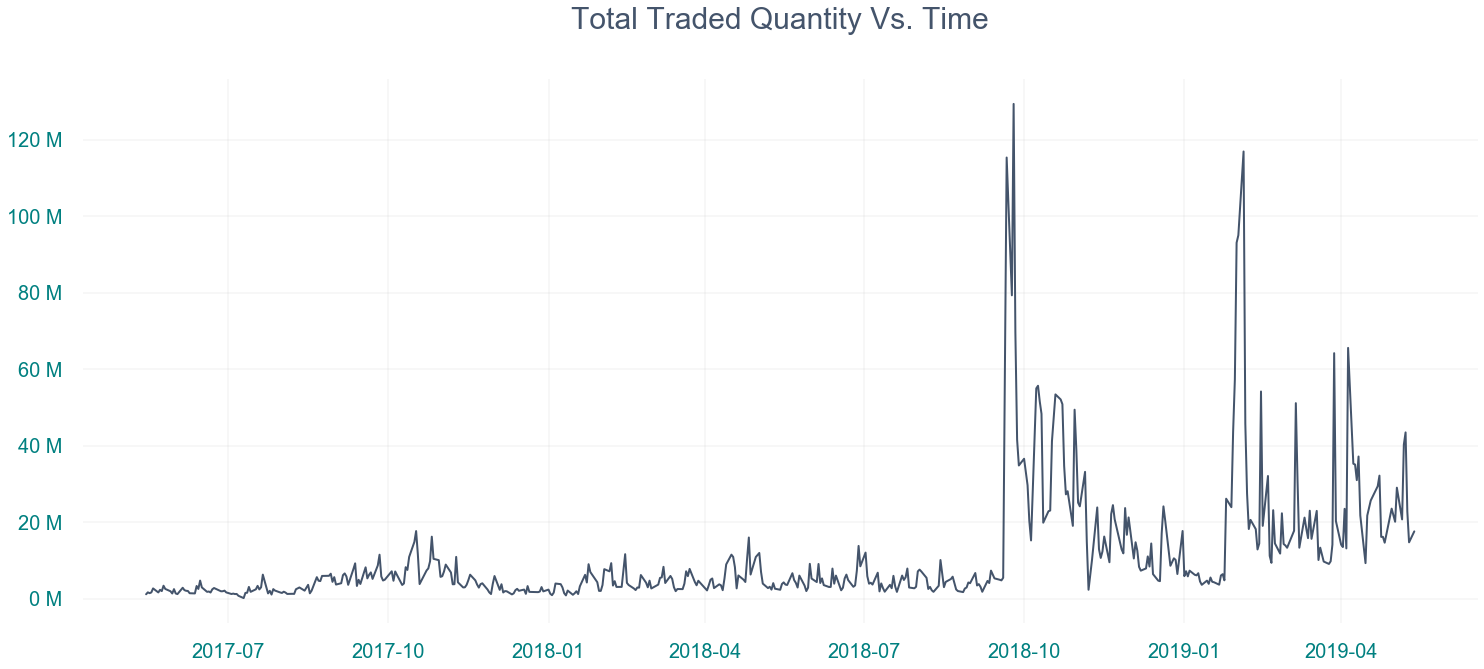

In [5]:
x = df.index
y = df['Total Traded Quantity']

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Total Traded Quantity Vs. Time', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)


def millions(x, pos):
    return '%1.0f M' % (x*1e-6)
formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
sns.lineplot(x, y, color='#44546B', linewidth=2, ax=ax)

# labels = [item.get_text()[:7] for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)

plt.xlabel('')
plt.ylabel('');

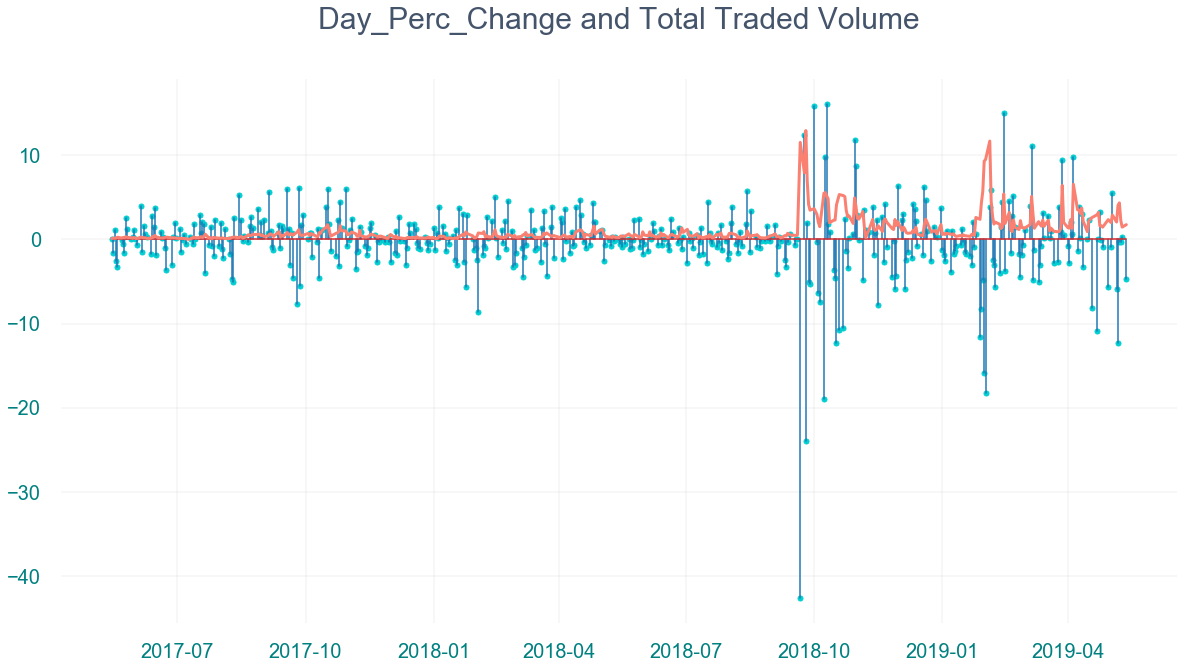

In [6]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Day_Perc_Change and Total Traded Volume', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

x = df.index
y = df['Day_Perc_Change']
(markers, stemlines, baseline) = plt.stem(x, y)
plt.setp(markers, marker='.', markersize=10, color='#00CED1')

x = df.index
y = df['Total Traded Quantity'] / 10e6
sns.lineplot(x, y, color='salmon', lw=3, ax=ax)

plt.xlabel('')
plt.ylabel('');

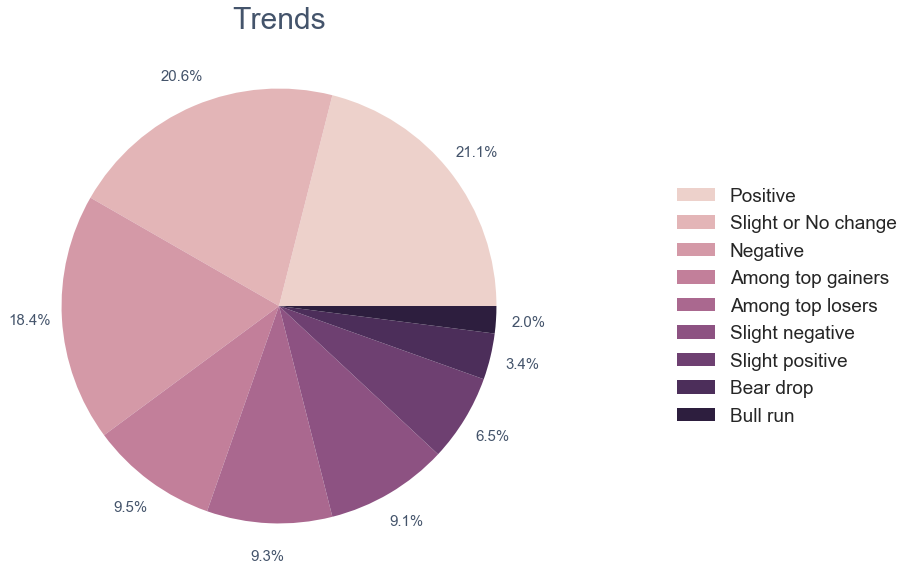

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Trends', color='#44546B', fontsize=30)

data = df['Trend'].value_counts()

wedges, texts, autotexts = ax.pie(data, colors=sns.cubehelix_palette(9), pctdistance=1.15, autopct='%1.1f%%', 
                                   textprops={'fontsize': 15, 'color': '#44546B'});

ax.legend(wedges, data.index, loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1), 
          prop={'size': 19}, frameon=False);

In [8]:
df_tr = df.groupby('Trend')['Total Traded Quantity'].agg(['mean', 'median'])
df_tr

,mean,median
Trend,,
Among top gainers,1.563252e+07,11057807.0
Among top losers,1.463443e+07,11183004.5
Bear drop,4.970570e+07,41149209.0
Bull run,5.463899e+07,52850290.0
Negative,6.044635e+06,3754461.0
Positive,8.306318e+06,4810073.5
Slight negative,5.539606e+06,3949566.0
Slight or No change,5.746745e+06,3166231.5
Slight positive,7.818417e+06,5936906.5


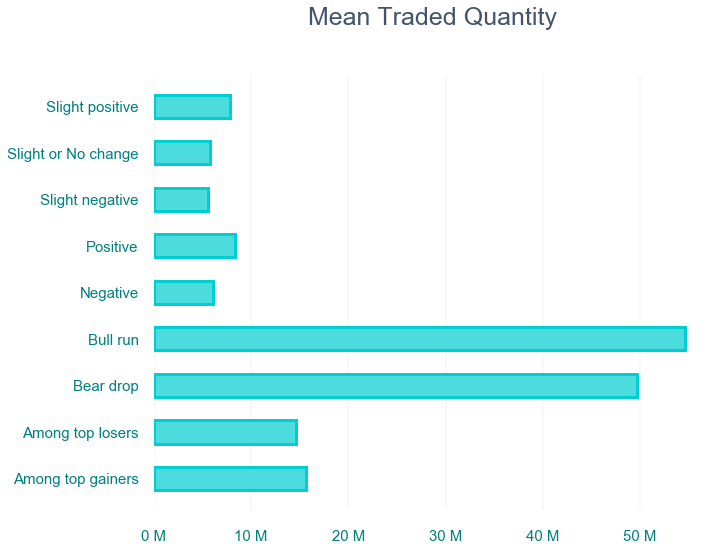

In [9]:
plt.style.use('seaborn-whitegrid')
fix, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Mean Traded Quantity', color='#44546B', pad=50, fontsize=25)

ax.set_xlabel('', fontsize=20, color='gray', fontstyle='italic', labelpad=30)
ax.set_ylabel('', fontsize=10, color='gray', fontstyle='italic', labelpad=30)

ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
ax.tick_params('y', colors='#008080', labelsize=15, pad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

def millions(x, pos):
    return '%1.0f M' % (x*1e-6)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

ax.grid(axis='x', color='gray', linewidth=0.1)
plt.gca().yaxis.grid(False)

ax.barh(width=df_tr['mean'], y=df_tr.index, color='#4cdcde', edgecolor='#00CED1', linewidth=3, height=0.5)

plt.ylabel('');
plt.xlabel('');

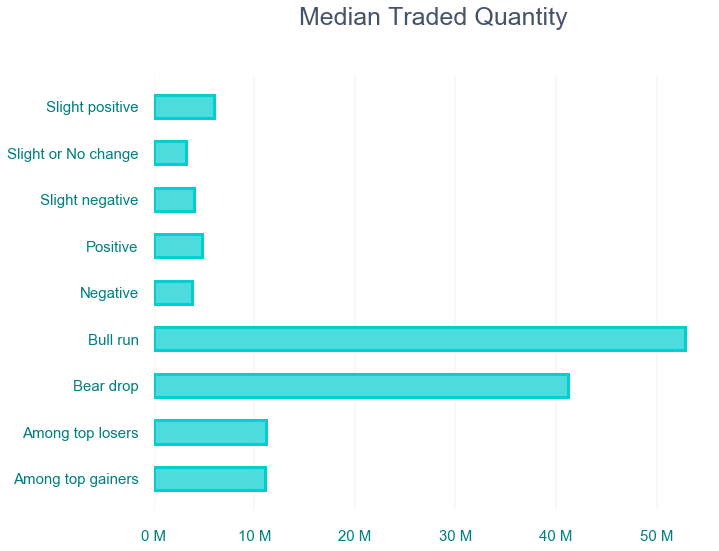

In [10]:
plt.style.use('seaborn-whitegrid')
fix, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Median Traded Quantity', color='#44546B', pad=50, fontsize=25)

ax.set_xlabel('', fontsize=20, color='gray', fontstyle='italic', labelpad=30)
ax.set_ylabel('', fontsize=10, color='gray', fontstyle='italic', labelpad=30)

ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
ax.tick_params('y', colors='#008080', labelsize=15, pad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

def millions(x, pos):
    return '%1.0f M' % (x*1e-6)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

ax.grid(axis='x', color='gray', linewidth=0.1)
plt.gca().yaxis.grid(False)

ax.barh(width=df_tr['median'], y=df_tr.index, color='#4cdcde', edgecolor='#00CED1', linewidth=3, height=0.5)

plt.ylabel('');
plt.xlabel('');

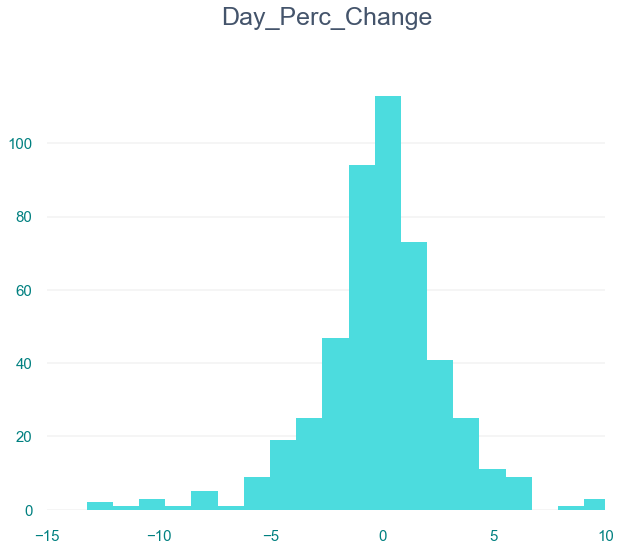

In [11]:
plt.style.use('seaborn-whitegrid')
fix, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Day_Perc_Change', color='#44546B', pad=50, fontsize=25)

ax.set_xlabel('', fontsize=20, color='gray', fontstyle='italic', labelpad=30)
ax.set_ylabel('', fontsize=10, color='gray', fontstyle='italic', labelpad=30)

ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
ax.tick_params('y', colors='#008080', labelsize=15, pad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(axis='y', color='gray', linewidth=0.15)
plt.gca().xaxis.grid(False)
plt.xlim(-15, 10)

sns.distplot(df['Day_Perc_Change'], bins=50, kde=False, 
             hist_kws={"linewidth": 3,"alpha": 1, 'color': '#4cdcde'})


plt.ylabel('');
plt.xlabel('');

In [12]:
df_concat = pd.DataFrame()

for i in os.listdir('..\\stocks'):
    df_temp = pd.read_csv(os.path.join('..\\stocks', i), usecols=['Series', 'Close Price'])
    df_temp = df_temp.loc[df_temp['Series'] == 'EQ']
    df_temp.drop('Series', axis=1, inplace=True)
    df_temp.columns = [i.split('.')[0]]
    df_concat[i.split('.')[0]] = df_temp[i.split('.')[0]]
    
nifty = pd.read_csv('..\\csv\\Nifty50.csv', usecols=['Close'])

df_concat['NIFTY'] = nifty
    
df_concat.head()

,HDFC,MARUTI,RELIANCE,TCS,TITAN,NIFTY
0,1559.50,6823.90,1344.10,2365.10,483.65,9445.40
2,1566.55,6958.20,1353.10,2455.35,481.75,9525.75
3,1552.50,6831.05,1327.35,2536.20,471.65,9429.45
5,1537.05,6701.70,1324.15,2531.35,481.40,9438.25
7,1520.60,6869.65,1297.70,2559.15,469.20,9360.55


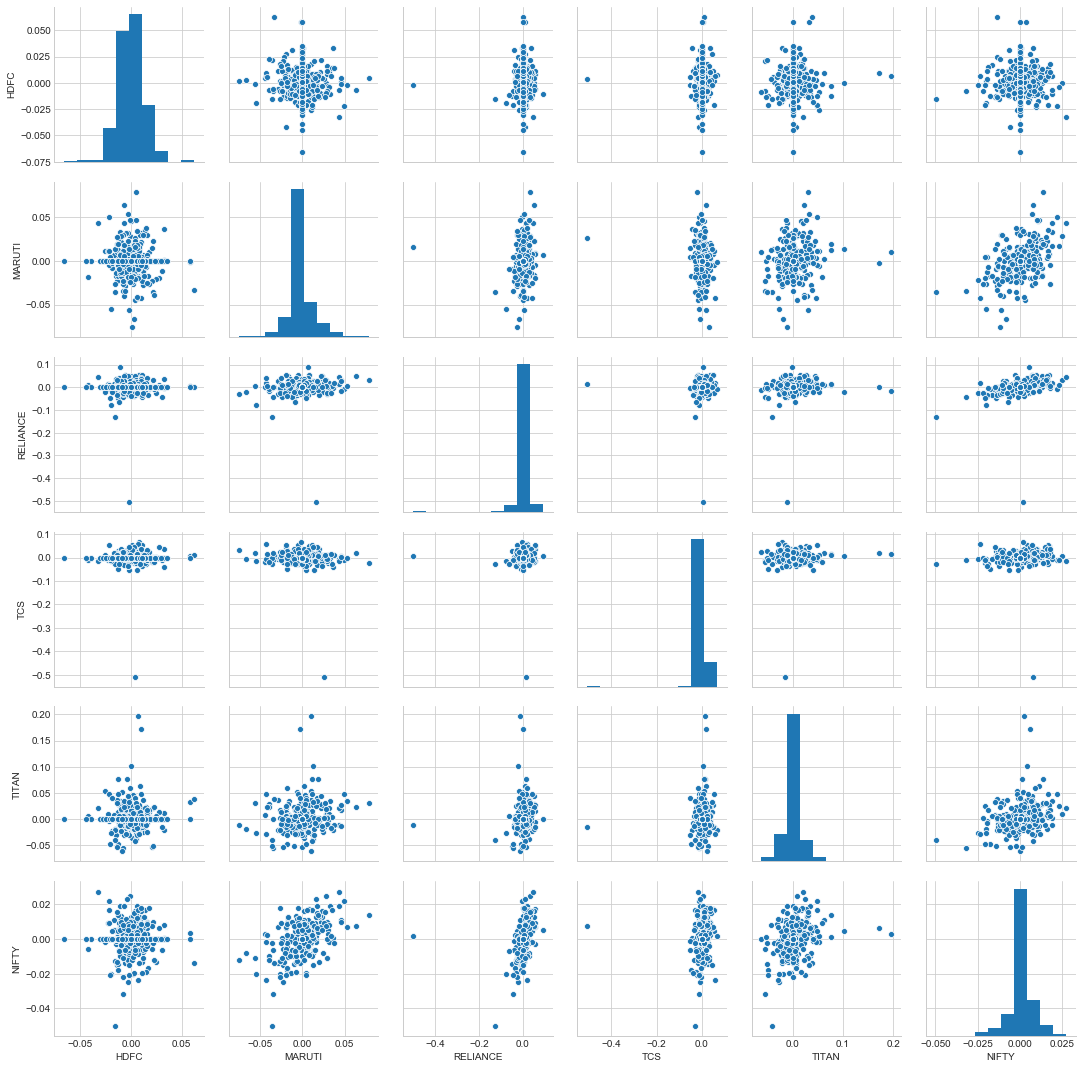

In [13]:
df_concat = df_concat.pct_change()
df_concat.replace([np.inf, -np.inf], np.nan, inplace=True)
df_concat = df_concat.dropna().reset_index(drop=True)

sns.pairplot(df_concat);

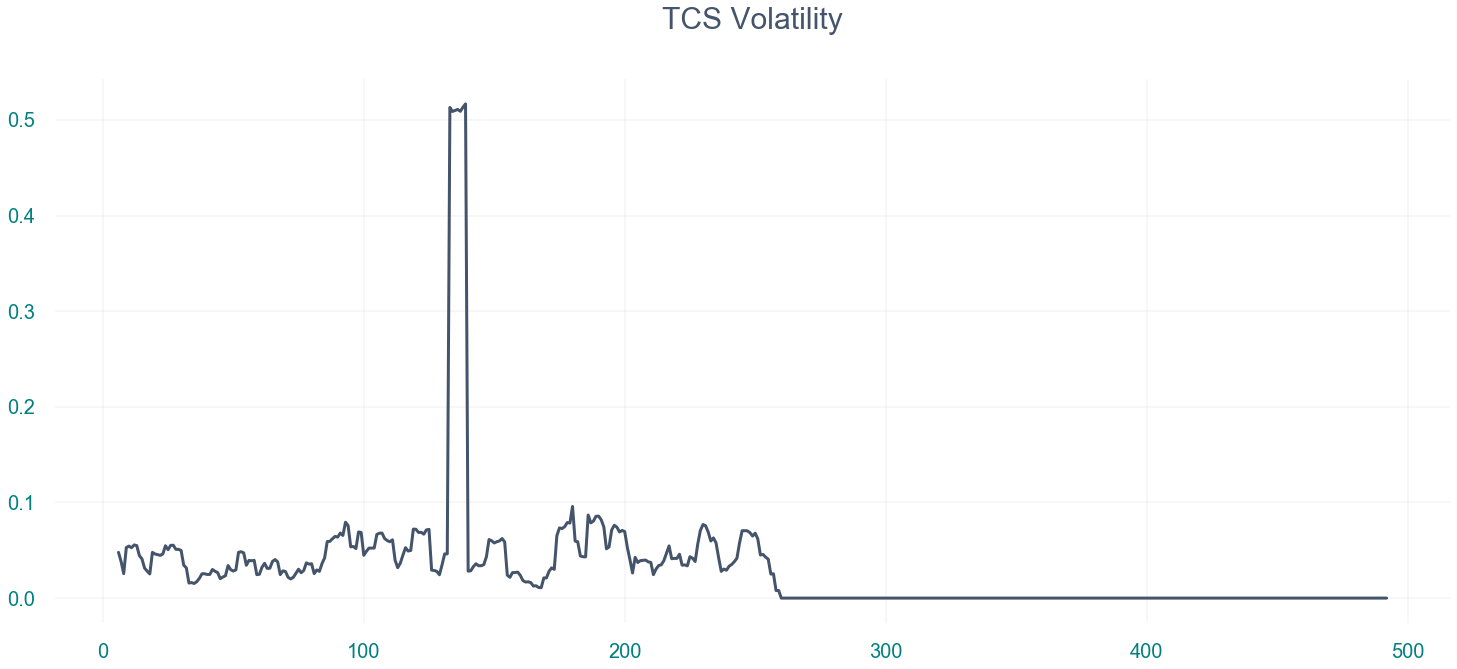

In [14]:
data = df_concat['TCS'].rolling(7).std() * np.sqrt(7)
x = data.index
y = data.values

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('TCS Volatility', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

sns.lineplot(x, y, color='#44546B', linewidth=3, ax=ax)

plt.xlabel('')
plt.ylabel('');

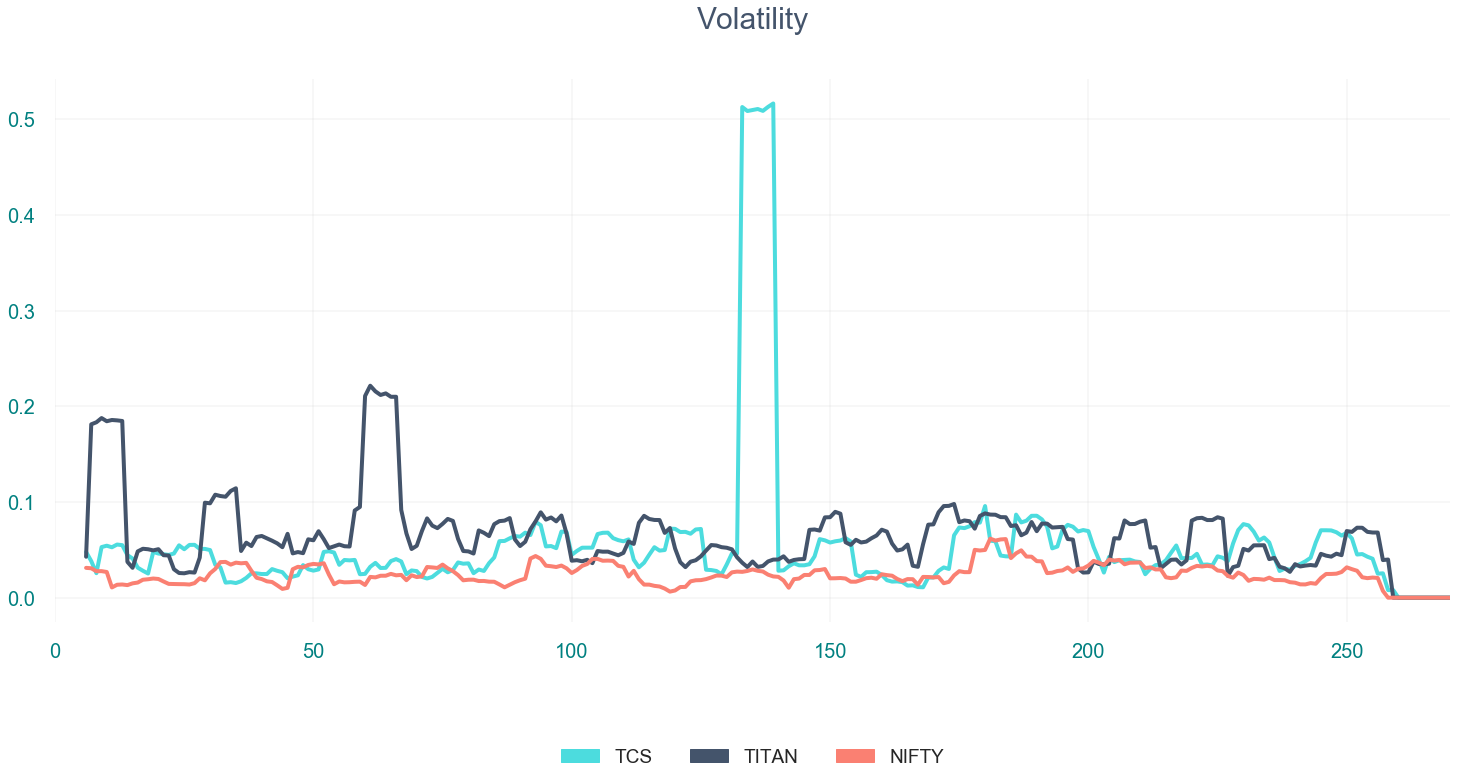

In [15]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Volatility', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

data = df_concat['TCS'].rolling(7).std() * np.sqrt(7)
x = data.index
y = data.values
sns.lineplot(x, y, color='#4cdcde', label='TCS', linewidth=4, ax=ax)

data = df_concat['TITAN'].rolling(7).std() * np.sqrt(7)
x = data.index
y = data.values
sns.lineplot(x, y, color='#44546B', linewidth=4, label='TITAN', ax=ax)

data = df_concat['NIFTY'].rolling(7).std() * np.sqrt(7)
x = data.index
y = data.values
sns.lineplot(x, y, color='salmon', label='NIFTY', linewidth=4, ax=ax)

plt.xlim(0, 270)

teal_patch = mpatches.Patch(color='#4CDCDE', label='TCS')
grey_patch = mpatches.Patch(color='#44546B', label='TITAN')
salmon_patch = mpatches.Patch(color='salmon', label='NIFTY')

ax.legend(handles=[teal_patch, grey_patch, salmon_patch],
          title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, prop={'size': 19}, frameon=False)

plt.xlabel('')
plt.ylabel('');

In [16]:
signal = pd.DataFrame(index=df.index)

signal['21_ma'] = df['Close Price'].rolling(21, 1).mean()
signal['34_ma'] = df['Close Price'].rolling(34, 1).mean()

signal['Do This'] = 0

signal['Do This'][21:] = np.where(signal['21_ma'][21:] > signal['34_ma'][21:], 1, 0)

signal['Position'] = signal['Do This'].diff()

signal.head()

C:\Users\Kaustubh\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,21_ma,34_ma,Do This,Position
Date,,,,
2017-05-15,431.400000,431.400000,0,NaN
2017-05-16,427.925000,427.925000,0,0.0
2017-05-17,428.283333,428.283333,0,0.0
2017-05-18,425.700000,425.700000,0,0.0
2017-05-19,421.400000,421.400000,0,0.0


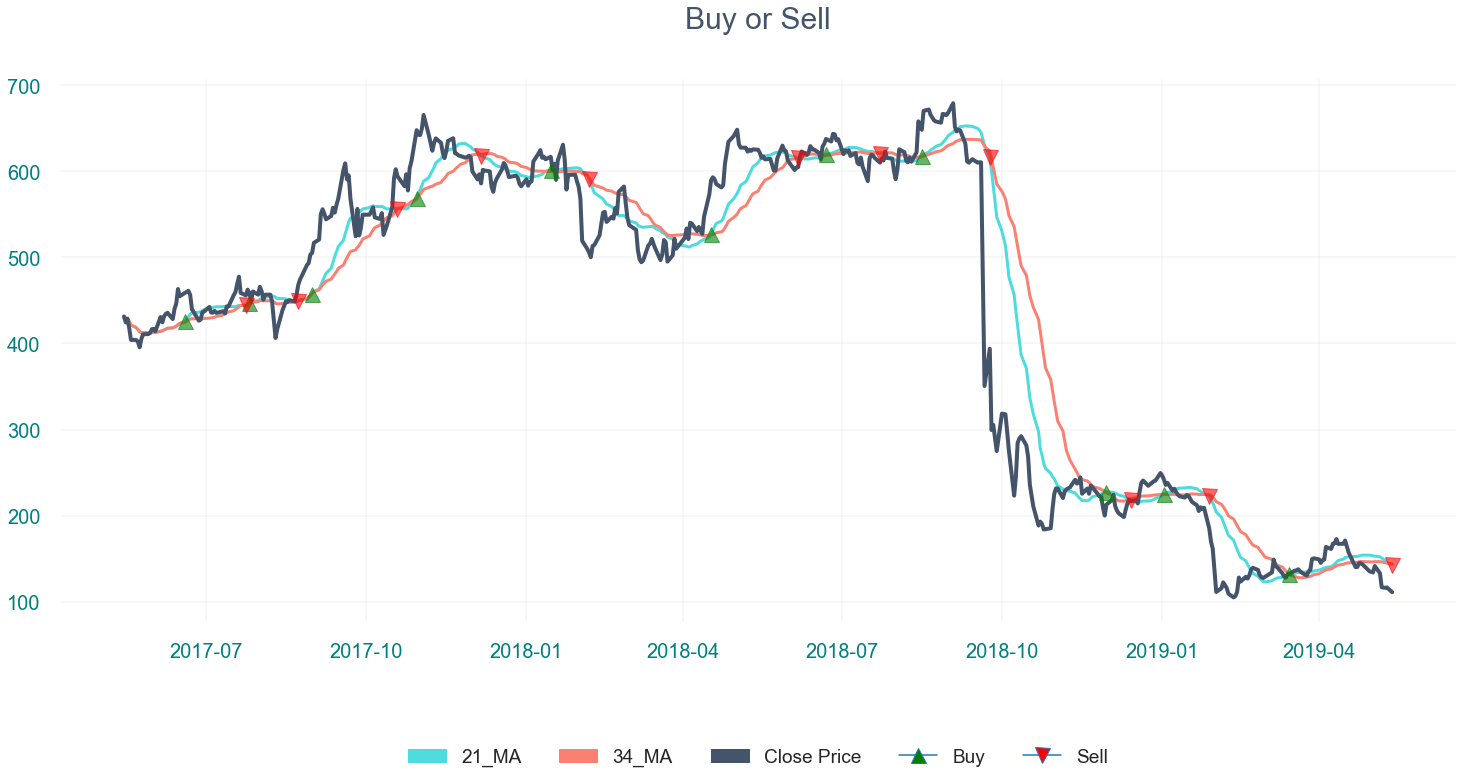

In [17]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Buy or Sell', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

x = signal.index
y = signal['21_ma']
sns.lineplot(x, y, color='#4CDCDE', linewidth=3, label='21_MA', ax=ax)

x = signal.index
y = signal['34_ma']
sns.lineplot(x, y, color='salmon', linewidth=3, label='34_MA', ax=ax)

x = df.index
y = df['Close Price']
sns.lineplot(x, y, color='#44546B', linewidth=4, label='Close Price', ax=ax)

ax.plot(signal.loc[signal['Position'] == 1].index, signal['21_ma'][signal['Position'] == 1], 
        '^', markersize=15, color='g', alpha=0.6)

ax.plot(signal.loc[signal['Position'] == -1].index, signal['21_ma'][signal['Position'] == -1], 
        'v', markersize=15, color='r', alpha=0.6)

teal_patch = mpatches.Patch(color='#4CDCDE', label='21_MA')
salmon_patch = mpatches.Patch(color='salmon', label='34_MA')
grey_patch = mpatches.Patch(color='#44546B', label='Close Price')
green_up = Line2D(range(1), range(1), marker='^', markerfacecolor='g', label='Buy', markersize=15)
red_down = Line2D(range(1), range(1), marker='v', markerfacecolor='r', label='Sell', markersize=15)

ax.legend(handles=[teal_patch, salmon_patch, grey_patch, green_up, red_down],
          title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, prop={'size': 19}, frameon=False)

plt.xlabel('')
plt.ylabel('');

In [18]:
def bbands(price, length=14, numsd=2):
    ave = price.rolling(length).mean()
    sd = price.rolling(length).std()
    
    uband = ave + sd * numsd
    lband = ave - sd * numsd
    
    return np.round(ave, 3), np.round(uband, 3), np.round(lband, 3)

df['Ave'], df['Upper'], df['Lower'] = bbands(df['Close Price'])

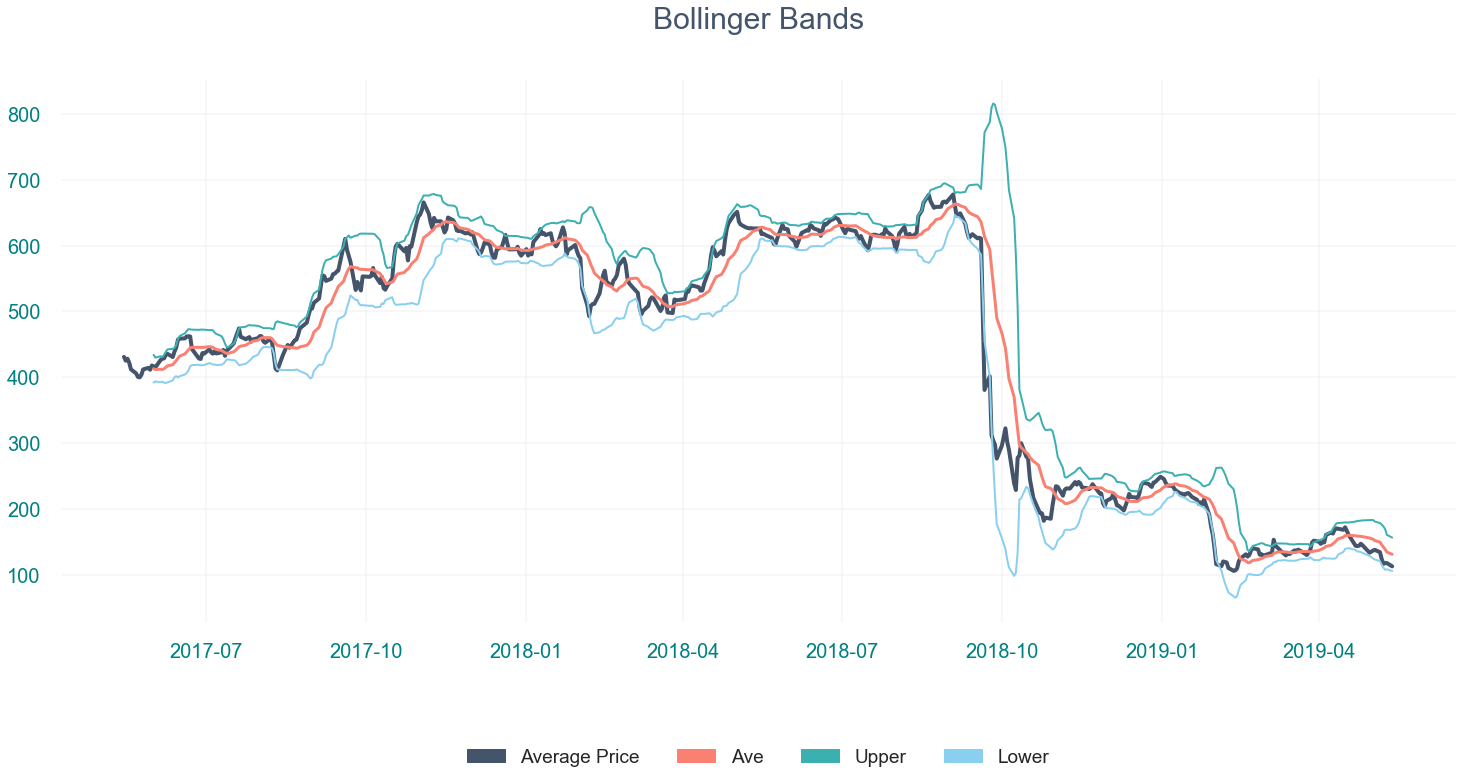

In [19]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Bollinger Bands', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

x = df.index
y = df['Average Price']
sns.lineplot(x, y, color='#44546B', linewidth=4, label='Average Price', ax=ax)

y = df['Ave']
sns.lineplot(x, y, color='salmon', linewidth=3, label='Ave', ax=ax)

y = df['Lower']
sns.lineplot(x, y, color='#89cff0', linewidth=2, label='Lower', ax=ax)

y = df['Upper']
sns.lineplot(x, y, color='#3cb0b1', linewidth=2, label='Upper', ax=ax)

grey_patch = mpatches.Patch(color='#44546B', label='Average Price')
salmon_patch = mpatches.Patch(color='salmon', label='Ave')
teal_patch = mpatches.Patch(color='#89cff0', label='Lower')
blue_patch = mpatches.Patch(color='#3cb0b1', label='Upper')

ax.legend(handles=[grey_patch, salmon_patch, blue_patch, teal_patch],
          title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, prop={'size': 19}, frameon=False)

plt.xlabel('')
plt.ylabel('');

In [20]:
df.drop('Date', axis=1, inplace=True)
df.to_csv('week3.csv', index=False)

In [21]:
# df_cp = df['Close Price'].resample('M').mean().to_frame()

# x = df_cp.index
# y = df_cp['Close Price']

# plt.style.use('seaborn-whitegrid')
# fig, ax = plt.subplots(figsize=(20, 10))

# ax.set_title('Closing Price ', color='#44546B', pad=50, fontsize=30)

# ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
# ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# plt.grid(True, color='gray', alpha=0.4, linewidth=0.5)

# sns.pointplot(x, y, color='#44546B', ax=ax)

# labels = [item.get_text()[:7] for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)

# plt.xlabel('')
# plt.ylabel('');